# cygnus


In [5]:
from importlib import reload

from matplotlib import cm

from utils import plots, tables
#%matplotlib widget

In [14]:
# Knobs
paths = {
    # Baseline models
    'degree1_features': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_features.csv', # Different Pythia features (max pooling, degree 1, 3 tilings)
    'degree1_baseline': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_baseline.csv', # Different baselines (BO, SPP, Bingo, next-line)
    'degree1_fixed_offset': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_fixed_offset.csv', # Different fixed offsets (-64 to +63)
    # Tuned Pythia models
    # Pythia tuned: epsilon ~1.8%, untimely reward = -1
    'degree1_tuned': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_tuned.csv', 
    'degree1_tuned_nofallback': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_tuned_nofallback.csv',
    'degree1_tuned_nozeroaction': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_tuned_nozeroaction.csv',
    # Featureless models (Pythia bias-only, Cygnus, BO)
    'degree1_featureless': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_featureless.csv',
    'degree1_featureless_tuned': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_featureless_tuned.csv',
    'degree1_featureless_tuned_nofallback': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_featureless_tuned_nofallback.csv',
    'degree1_featureless_tuned_nozeroaction': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_featureless_tuned_nozeroaction.csv',
    # Cygnus with different action selection schemes.
    # 'degree1_featureless_tuned_ucb': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_featureless_tuned_ucb.csv',
    # 'degree1_featureless_tuned_acc': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_featureless_tuned_acc.csv',
    # 'degree1_featureless_tuned_timelyacc': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_featureless_tuned_timelyacc.csv',
}

suites = [
    #('spec06', 'one_phase'),
    #('spec06', 'weighted'),
    #('gap', 'one_phase'),
    ('google', 'one_phase')
]
metrics  = [
    'ipc_improvement',
]
features = [{'Delta_Path', 'PC_Delta'}, {'PC'}]
baselines = ['bo', 'spp_dev2', 'bingo', 'next_line', 'ip_stride']
dpi = 150

# Plots (suites)
Fix prefetch degree to 1 for everything.

In [11]:
from importlib import reload
from utils import utils
reload(tables)
reload(utils)
dfs = {
    # Baseline models
    'degree1_baseline': tables.load_stats_csv(paths['degree1_baseline'], baselines, prefetchers_level='l2'),
    'degree1_baseline_pythia': tables.load_stats_csv_pythia(paths['degree1_baseline'], features),
    'degree1_fixed_offset': tables.load_stats_csv_next_line(paths['degree1_fixed_offset'], offsets=['best']),
    # Tuned Pythia models
    'degree1_tuned': tables.load_stats_csv_pythia(paths['degree1_tuned'], features),
    'degree1_tuned_nofallback': tables.load_stats_csv_pythia(paths['degree1_tuned_nofallback'], features),
    'degree1_tuned_nozeroaction': {
        **tables.load_stats_csv_pythia(paths['degree1_tuned_nozeroaction'], features),
        **tables.load_stats_csv(paths['degree1_tuned_nozeroaction'], ['cygnus_state'], prefetchers_level='l2'),
    },
    # Featureless models (Pythia bias-only, Cygnus, BO)
    'degree1_featureless': tables.load_stats_csv(paths['degree1_featureless'], ['pythia', 'cygnus'], prefetchers_level='l2'),
    'degree1_featureless_tuned': tables.load_stats_csv(paths['degree1_featureless_tuned'], ['pythia', 'cygnus', 'bo'], prefetchers_level='l2'),
    'degree1_featureless_tuned_nofallback': tables.load_stats_csv(paths['degree1_featureless_tuned_nofallback'], ['pythia', 'cygnus'], prefetchers_level='l2'),
    'degree1_featureless_tuned_nozeroaction': tables.load_stats_csv(paths['degree1_featureless_tuned_nozeroaction'], ['pythia', 'cygnus', 'bo'], prefetchers_level='l2'),
    # Cygnus with different action selection schemes.
    # 'degree1_featureless_tuned_ucb': tables.load_stats_csv(paths['degree1_featureless_tuned_ucb'], ['cygnus'], prefetchers_level='l2'),
    # 'degree1_featureless_tuned_acc': tables.load_stats_csv(paths['degree1_featureless_tuned_acc'], ['cygnus'], prefetchers_level='l2'),
    # 'degree1_featureless_tuned_timelyacc': tables.load_stats_csv(paths['degree1_featureless_tuned_timelyacc'], ['cygnus'], prefetchers_level='l2'),
}

## Baseline comparison

=== google one_phase ===


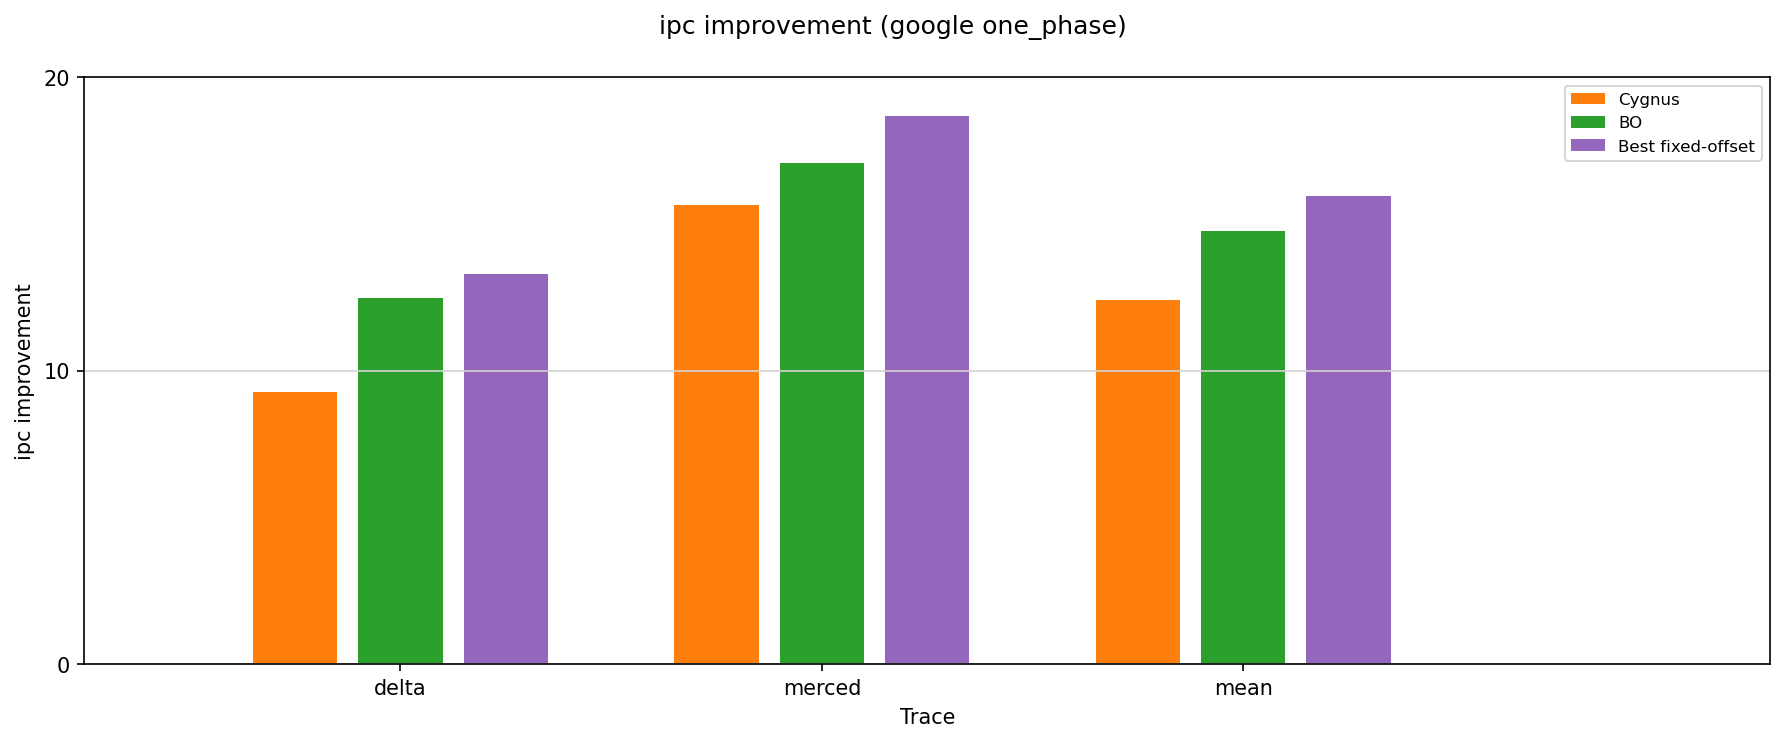

In [15]:
bias_df = {
    #'Pythia': dfs['degree1_tuned_nozeroaction']['Delta_Path, PC_Delta'],
    # 'Pythia': dfs['degree1_baseline_pythia']['Delta_Path, PC_Delta'],
    #'Pythia bias-only': dfs['degree1_featureless_tuned_nozeroaction']['pythia'],
    # 'Pythia bias-only': dfs['degree1_featureless']['pythia'],
    'Cygnus': dfs['degree1_featureless_tuned_nozeroaction']['cygnus'],
    # 'Cygnus': dfs['degree1_featureless']['cygnus'],
    'BO': dfs['degree1_featureless_tuned_nozeroaction']['bo'],
    # 'BO': dfs['degree1_baseline']['bo'],
    'Best fixed-offset': dfs['degree1_fixed_offset']['best'],
    #'Next-line': dfs['degree1_baseline']['next_line'],
    #'SPP': dfs['degree1_baseline']['spp_dev2'],
    #'Bingo': dfs['degree1_baseline']['bingo'],
}
bias_df_colors = {
    'Pythia': 'C0',
    'Pythia bias-only': 'C7',
    'Cygnus': 'C1',
    'BO': 'C2',
    'Best fixed-offset': 'C4',
    'Next-line': 'C3',
    'SPP': 'C5'
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
    #'loc': 'upper left',
    #'bbox_to_anchor': (0, 1),
}
plots.plot_everything(bias_df, suites=suites, metrics=metrics, 
                      legend_kwargs=legend_kwargs, dpi=dpi, colors=bias_df_colors,figsize=(12,5))

## Tuned

=== spec06 weighted ===


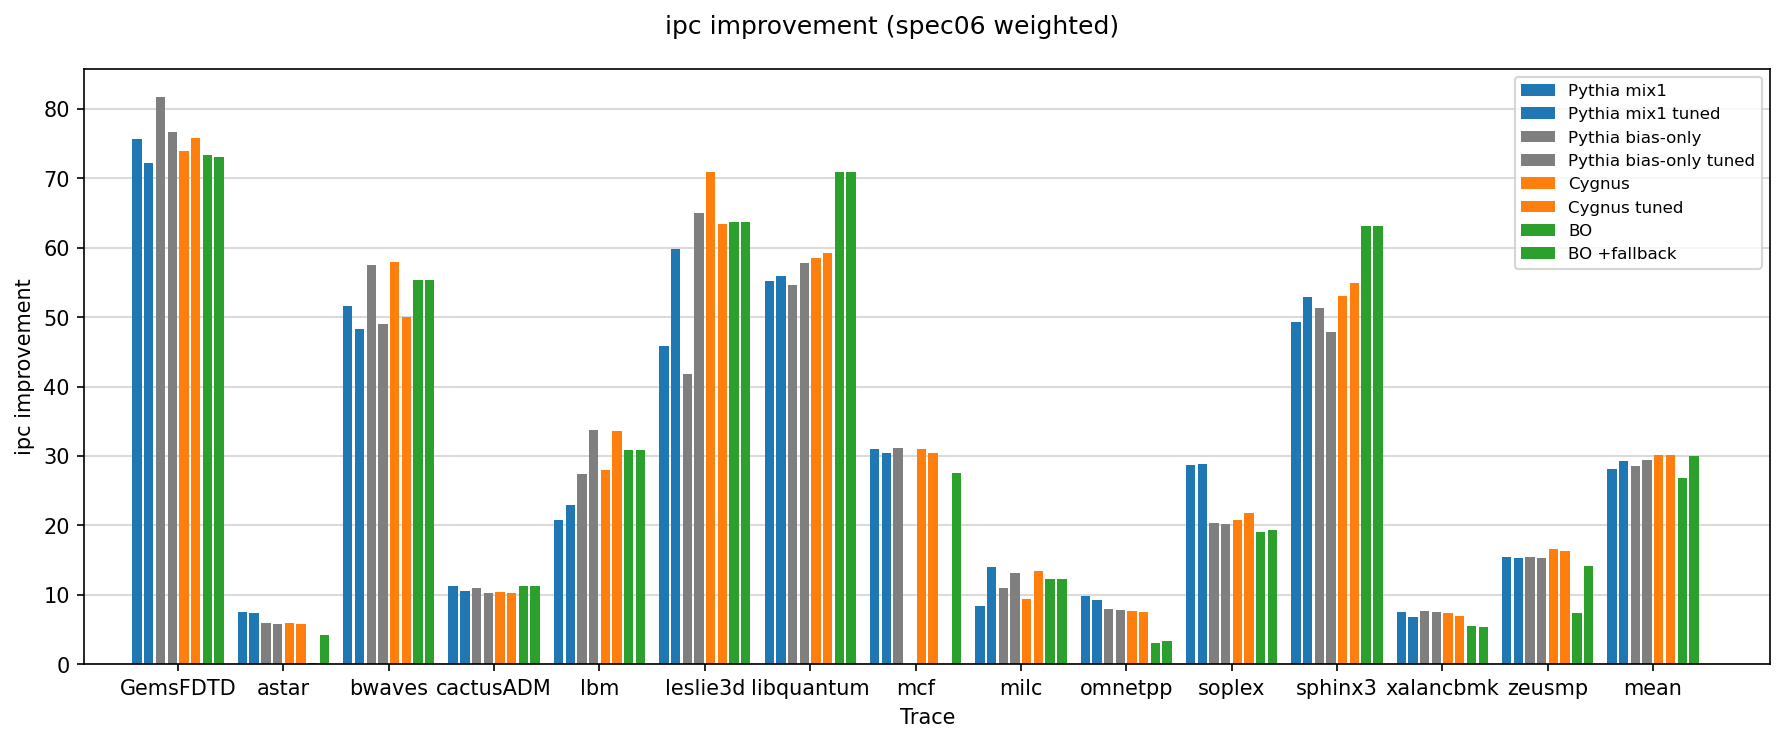

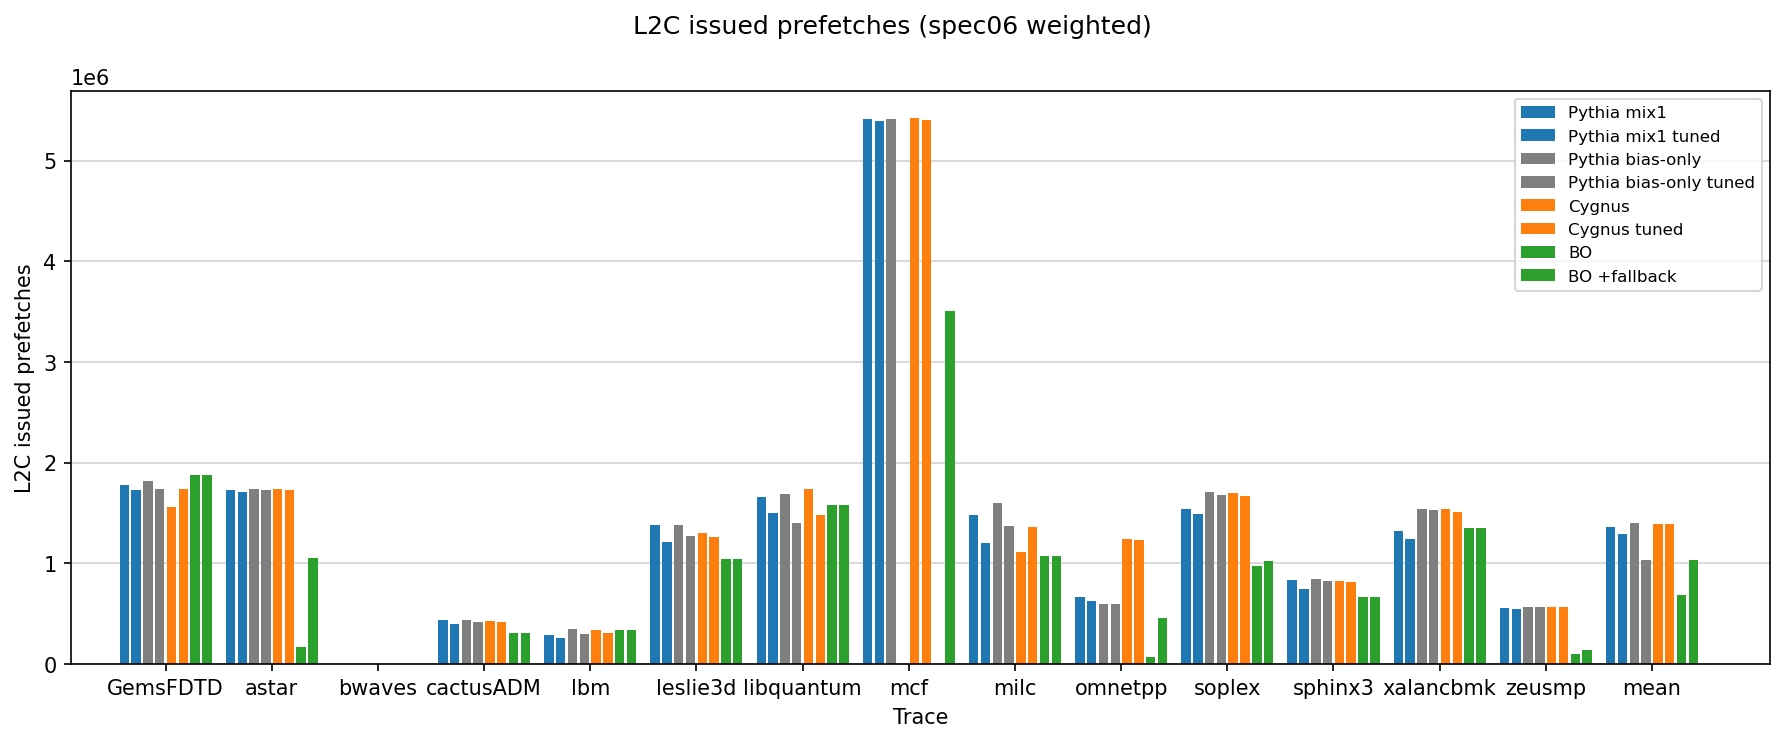

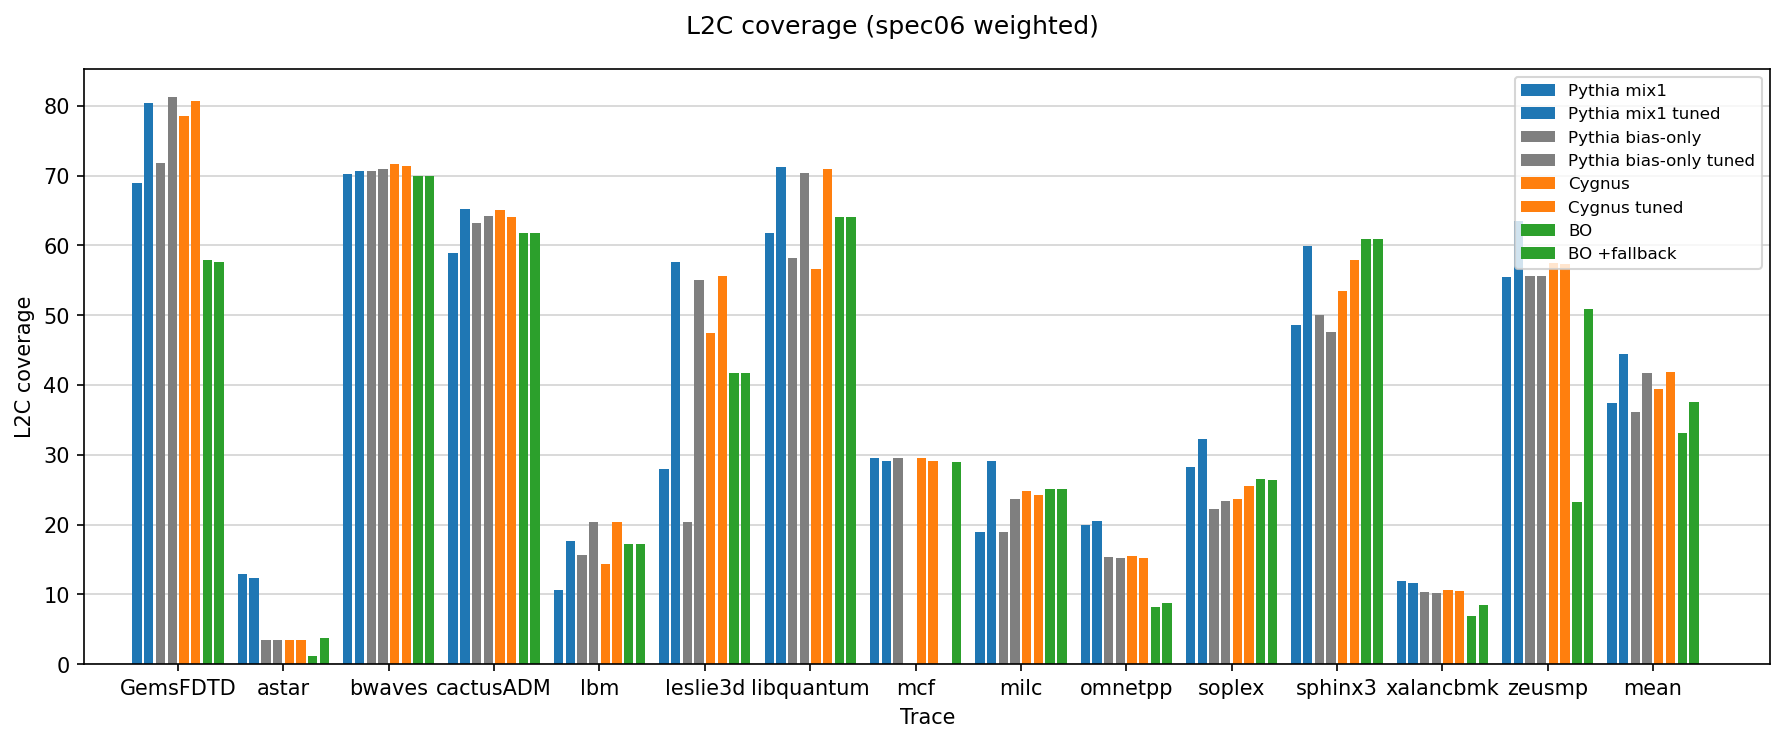

=== gap one_phase ===


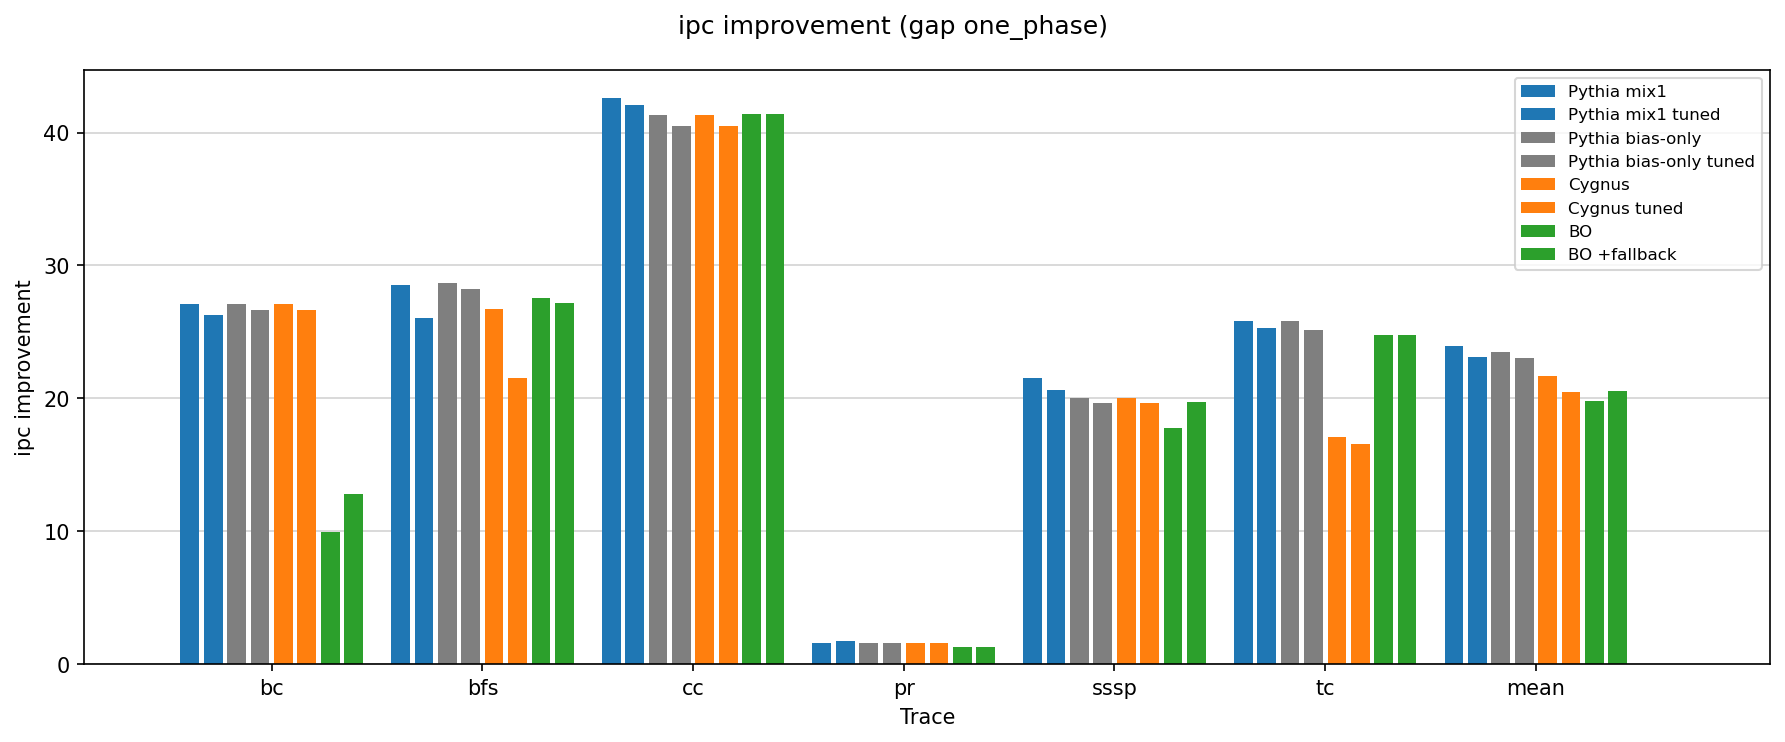

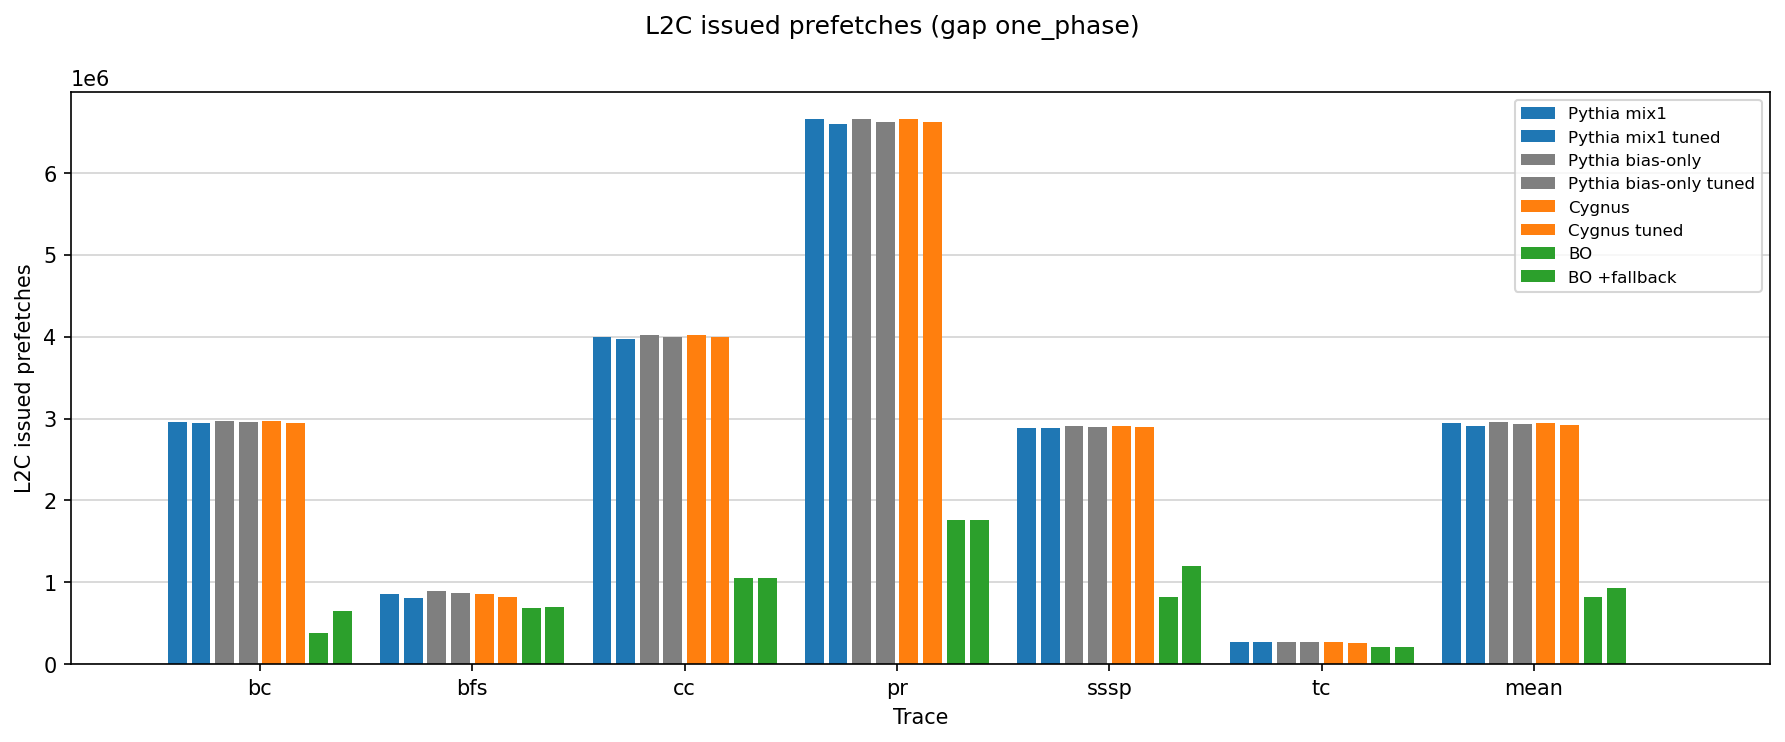

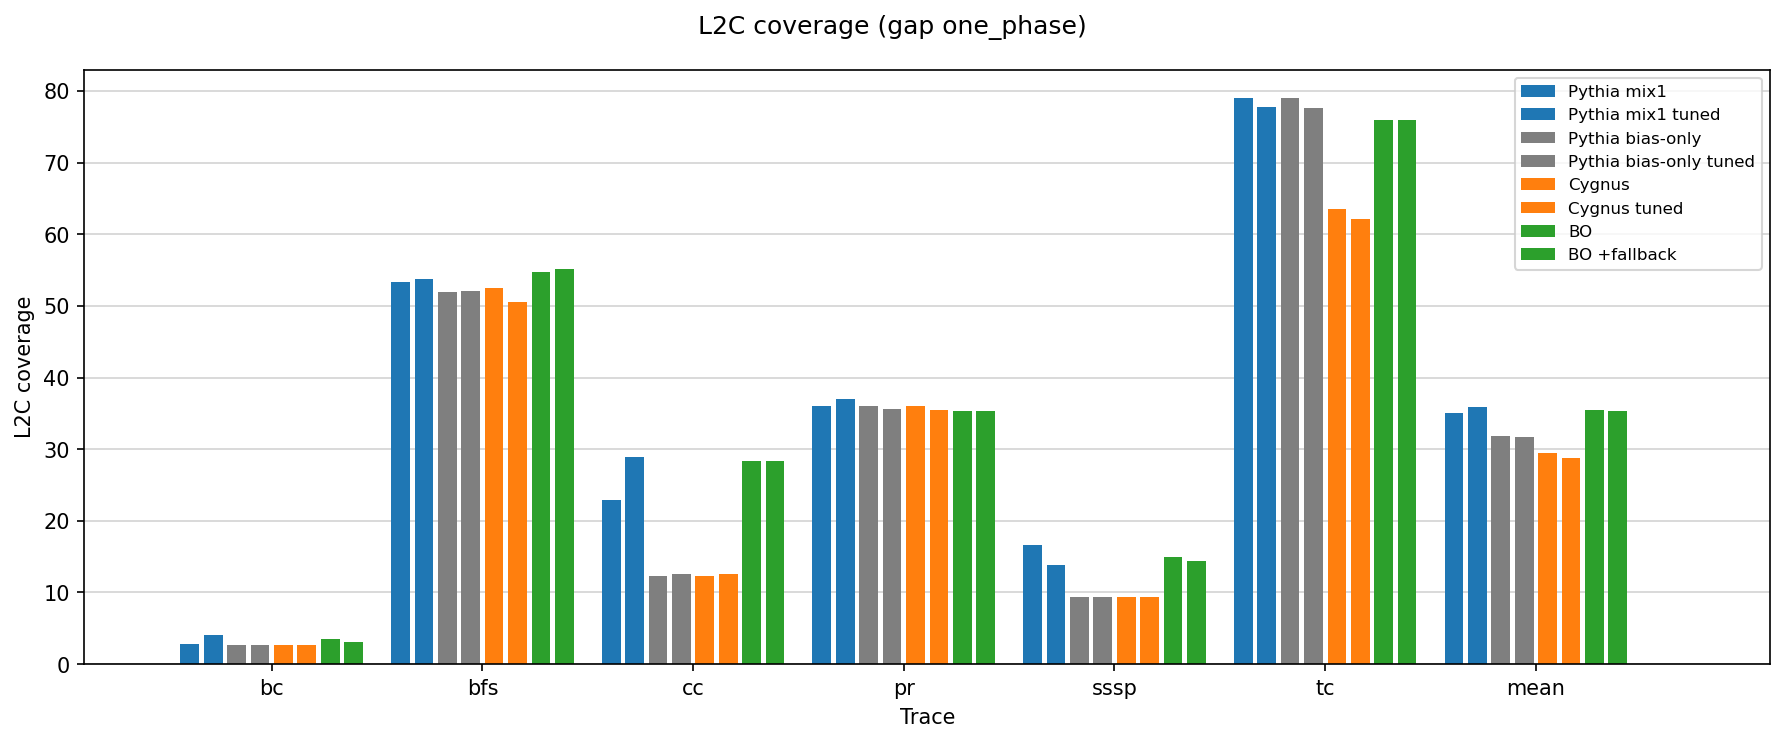

In [5]:
tuned_df = {
    'Pythia mix1': dfs['degree1_baseline_pythia']['Delta_Path, PC_Delta'], # (tiled max)
    'Pythia mix1 tuned': dfs['degree1_tuned']['Delta_Path, PC_Delta'],
    'Pythia bias-only': dfs['degree1_featureless']['pythia'],
    'Pythia bias-only tuned': dfs['degree1_featureless_tuned']['pythia'],
    'Cygnus': dfs['degree1_featureless']['cygnus'],
    'Cygnus tuned': dfs['degree1_featureless_tuned']['cygnus'],
    'BO': dfs['degree1_baseline']['bo'],
    'BO +fallback': dfs['degree1_featureless_tuned']['bo'],
    #'Next-line': dfs['degree1_baseline']['next_line'],
    #'SPP': dfs['degree1_baseline']['spp_dev2'],
    #'Bingo': dfs['degree1_baseline']['bingo'],
}
tuned_df_colors = {
    'Pythia mix1': 'C0',
    'Pythia mix1 tuned': 'C0',
    'Pythia bias-only': 'C7',
    'Pythia bias-only tuned': 'C7',
    'Cygnus': 'C1',
    'Cygnus tuned': 'C1',
    'Cygnus tuned ucb': 'C1',
    'BO': 'C2',
    'BO +fallback': 'C2'
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
    #'loc': 'upper left',
    #'bbox_to_anchor': (0, 1),
}
plots.plot_everything(tuned_df, suites=suites, metrics=metrics, colors=tuned_df_colors,
                      legend_kwargs=legend_kwargs, dpi=dpi, figsize=(12,5))

## Action fallback

=== spec06 weighted ===


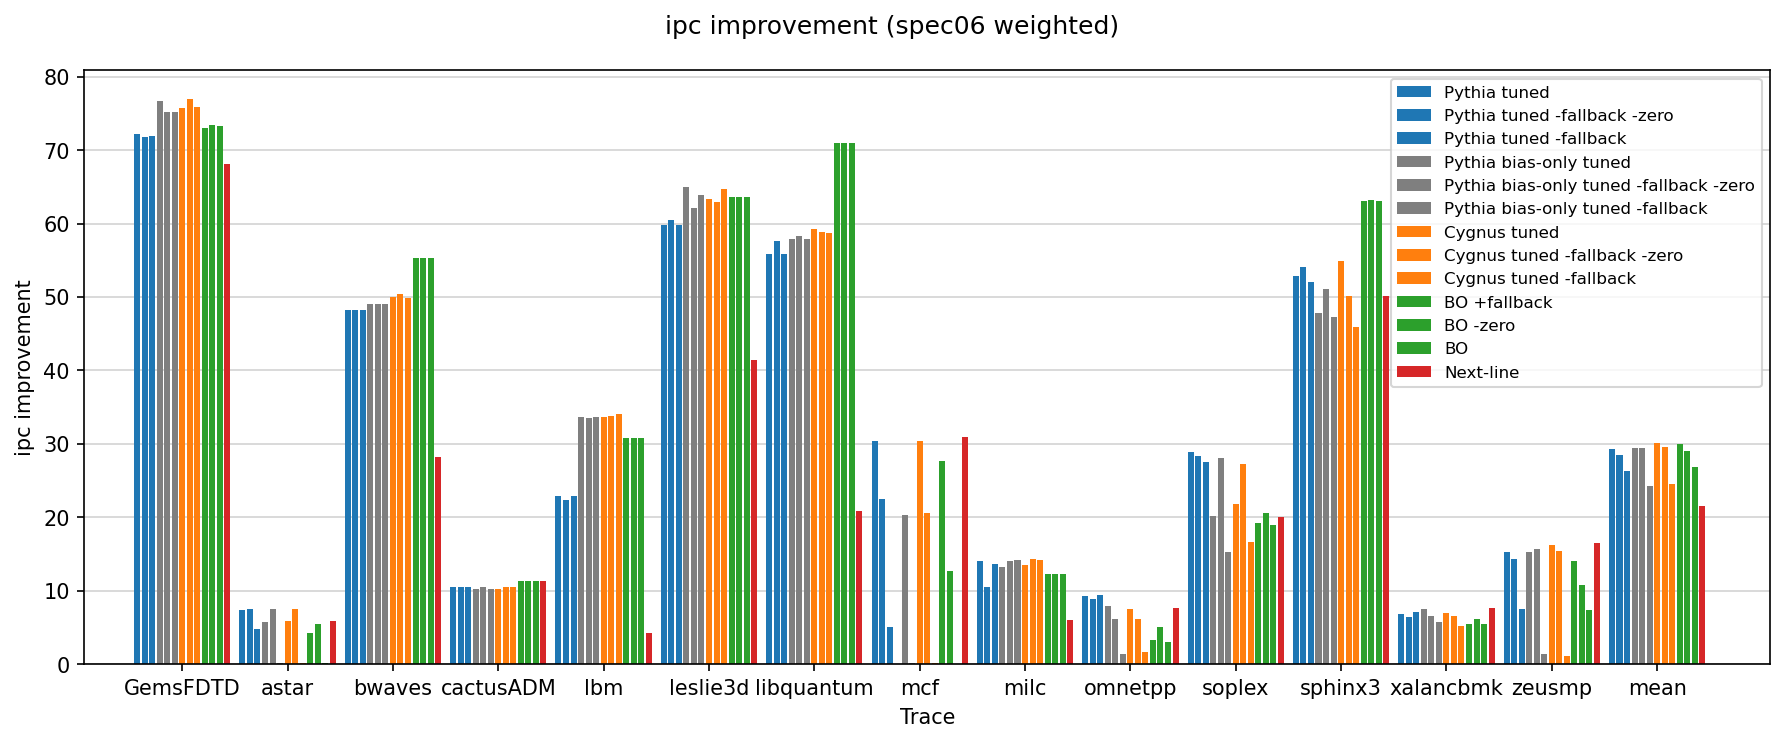

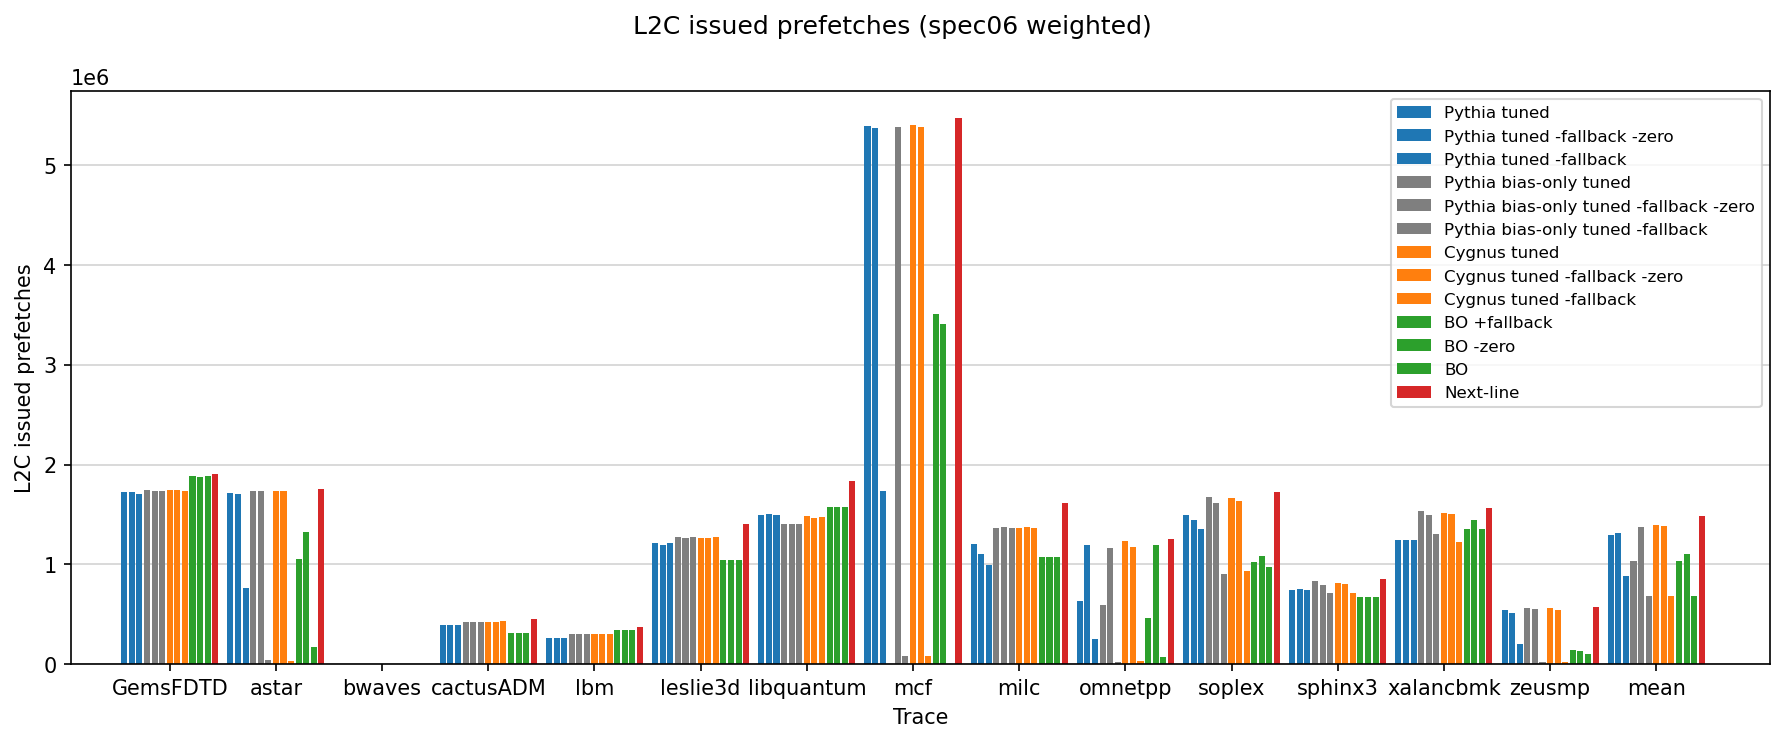

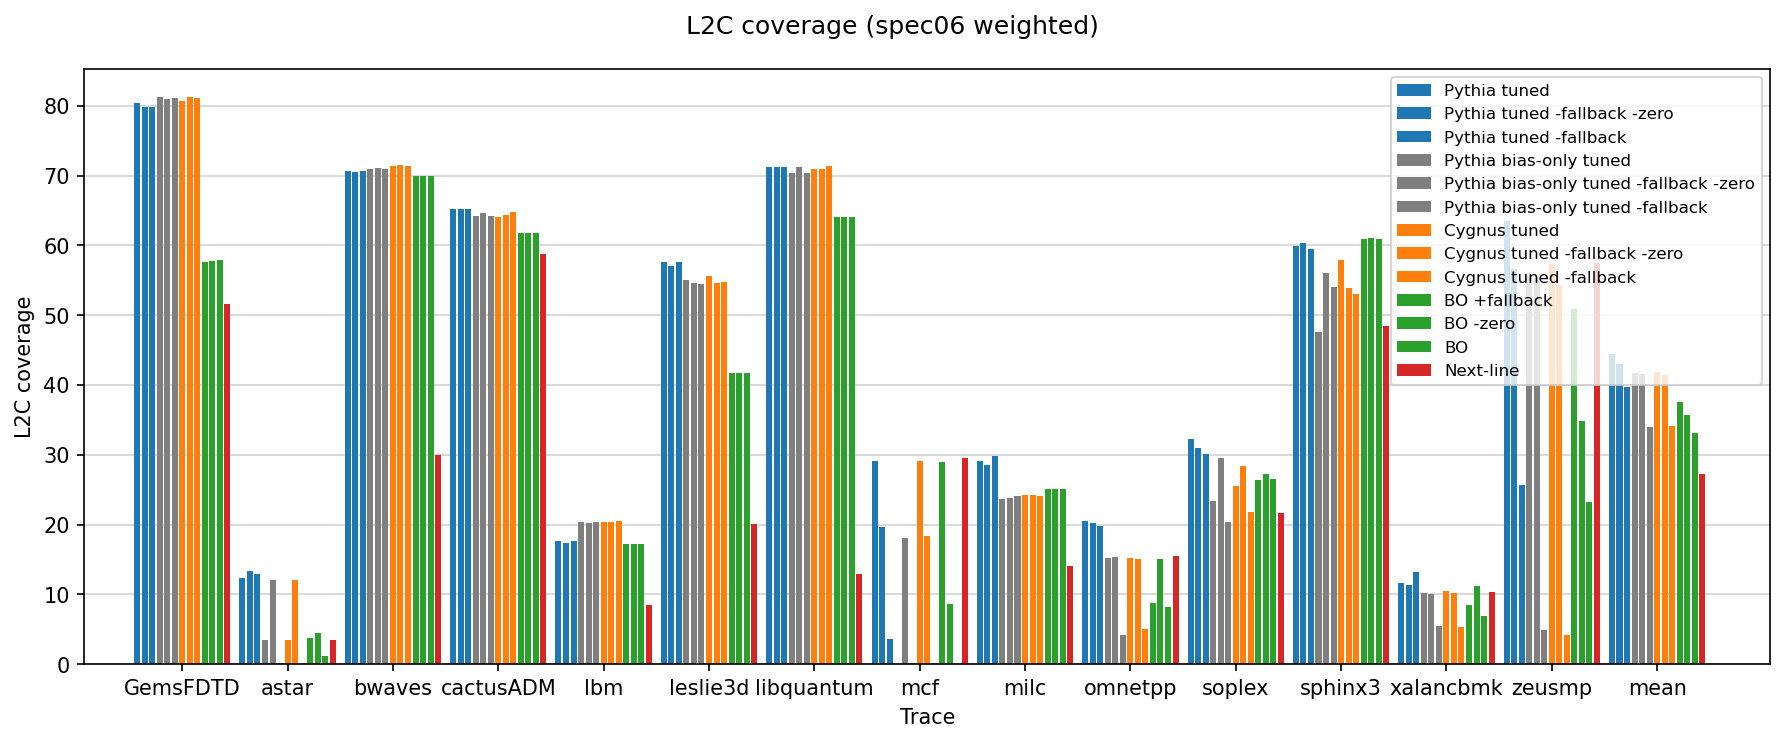

=== gap one_phase ===


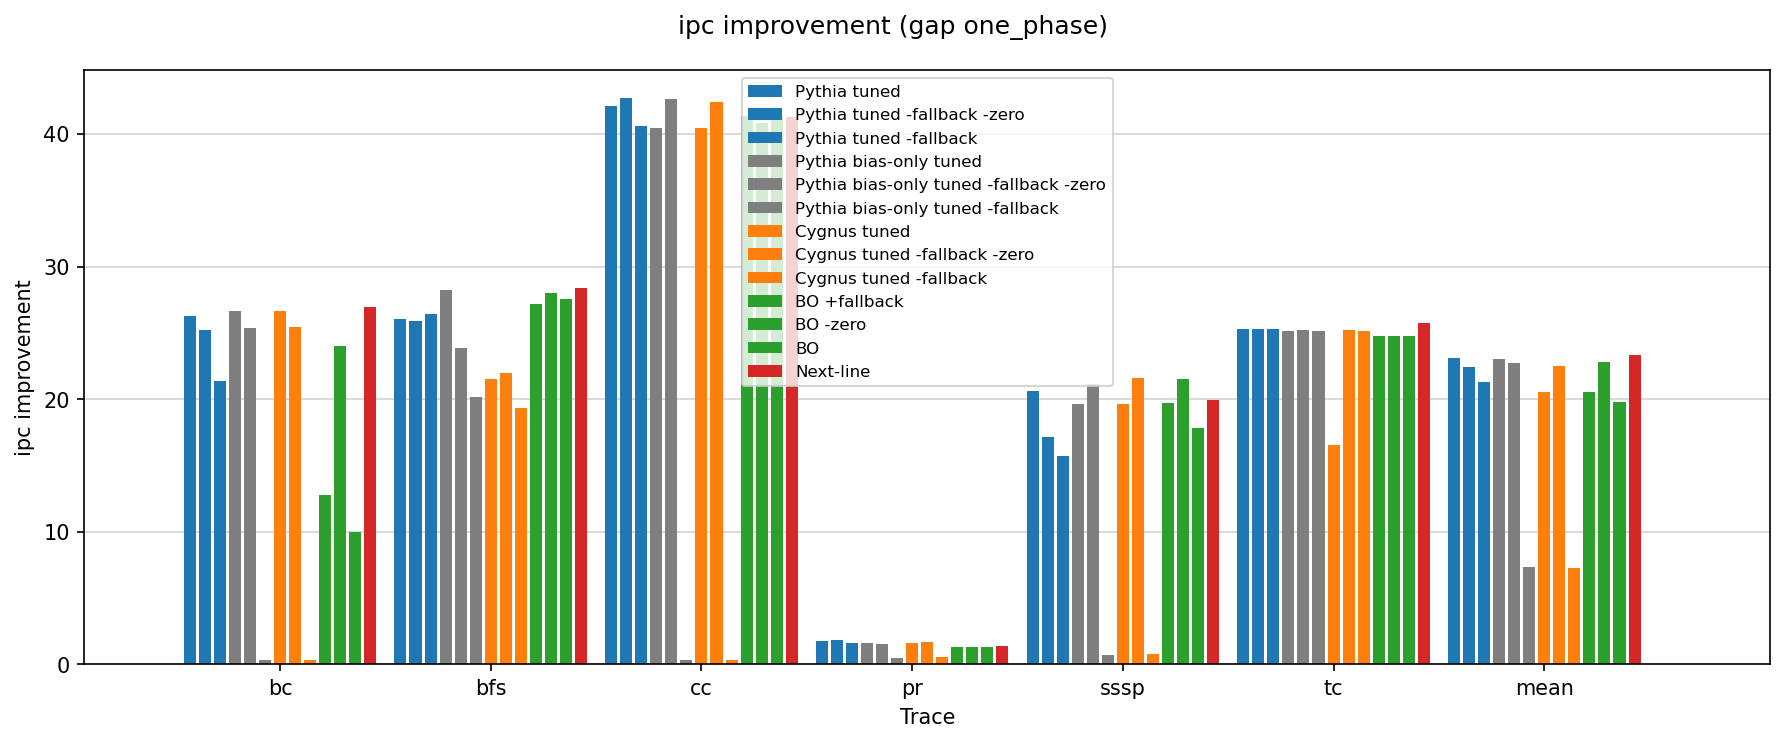

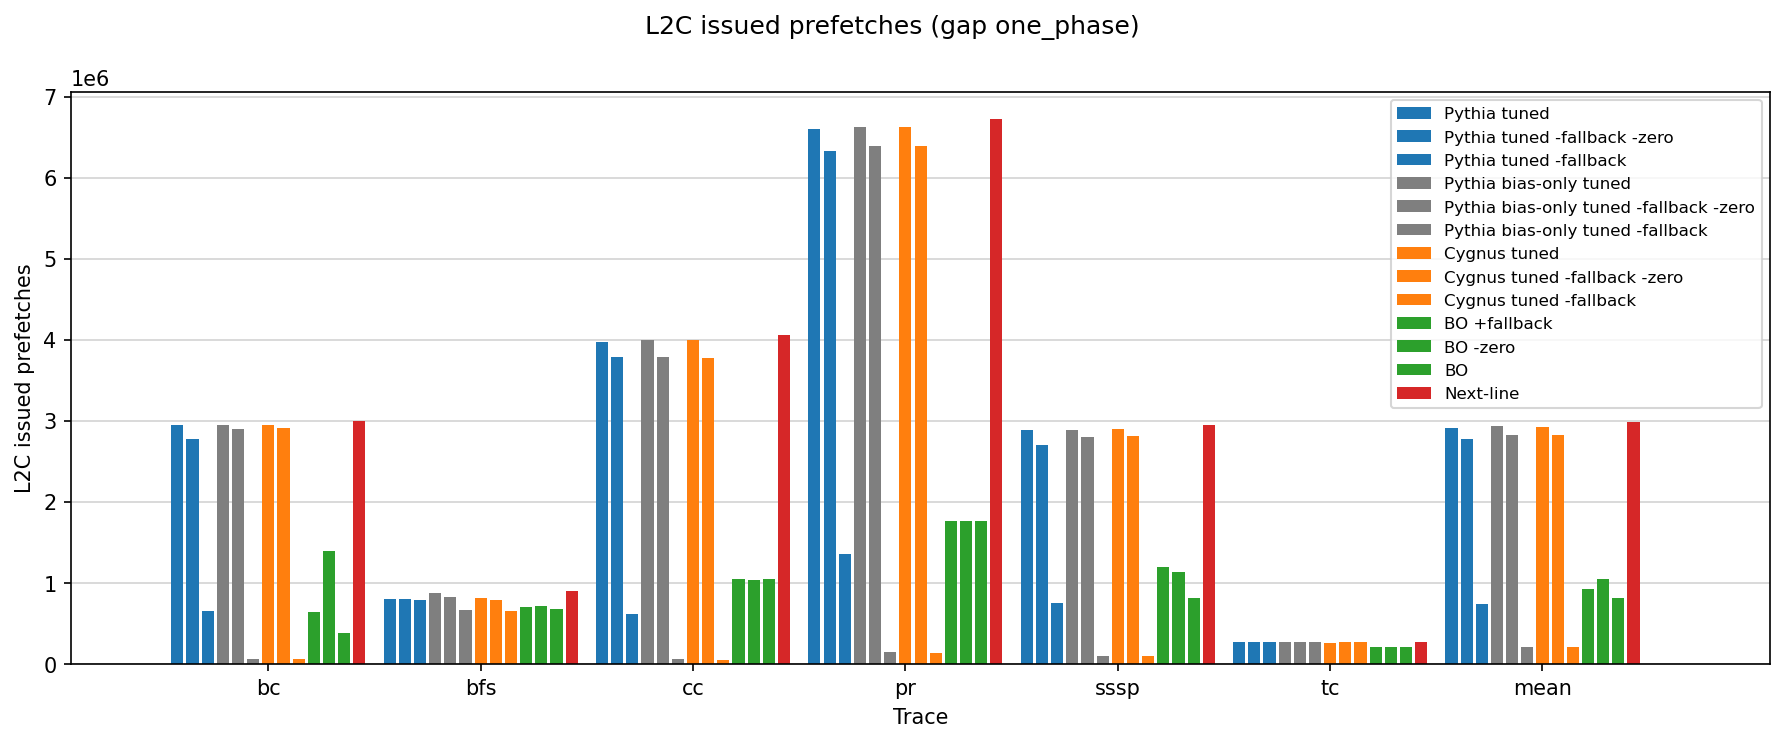

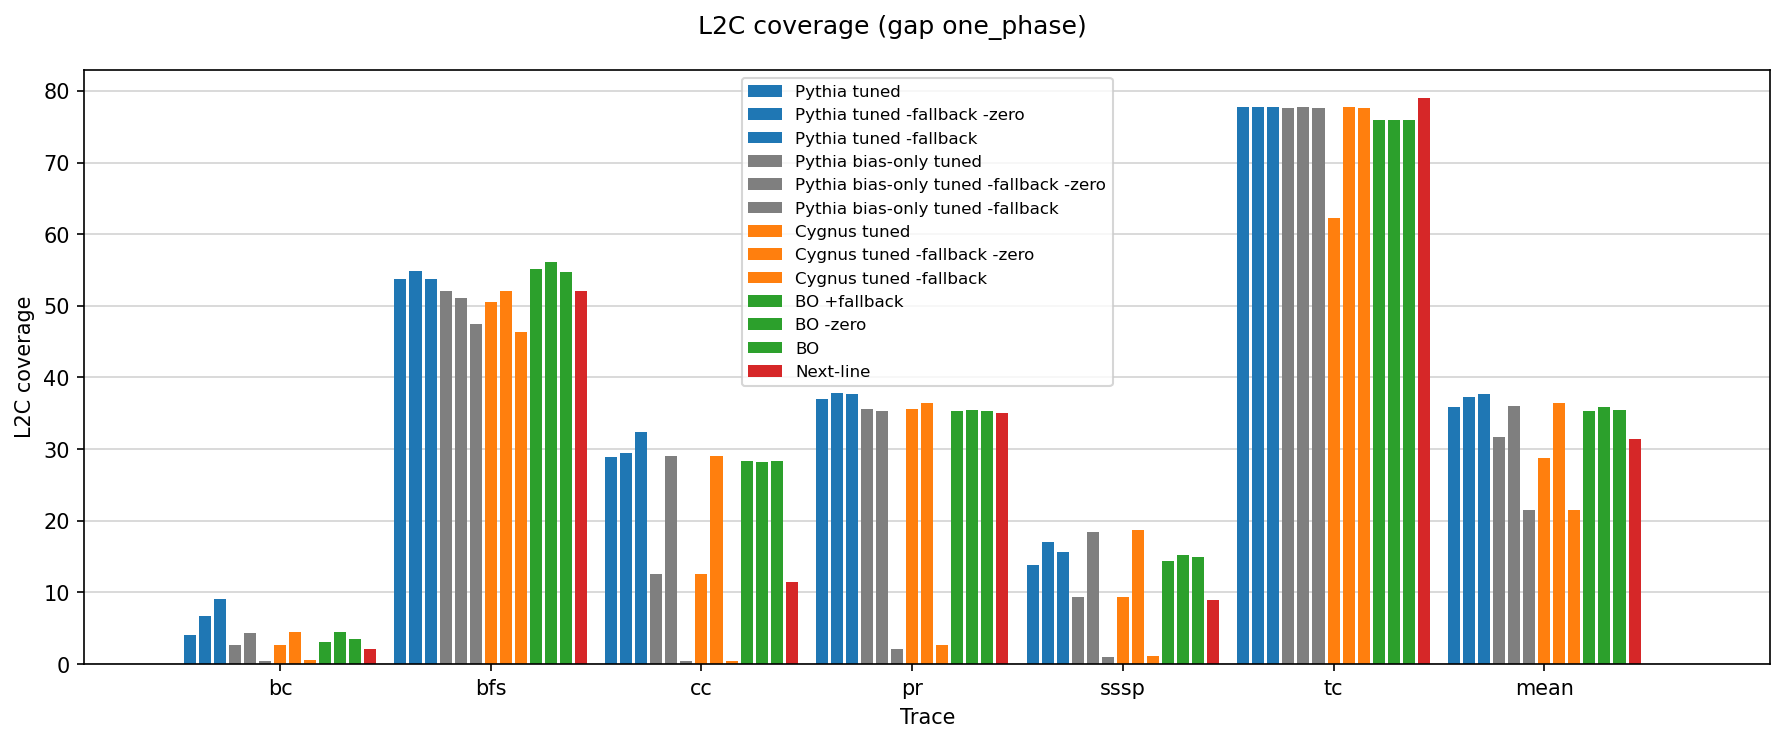

In [6]:
fallback_df = {
    # Pythia PC_Delta, Delta_Path
    'Pythia tuned': dfs['degree1_tuned']['Delta_Path, PC_Delta'],
    'Pythia tuned -fallback -zero': dfs['degree1_tuned_nozeroaction']['Delta_Path, PC_Delta'],
    'Pythia tuned -fallback': dfs['degree1_tuned_nofallback']['Delta_Path, PC_Delta'],
    # Pythia bias-only
    'Pythia bias-only tuned': dfs['degree1_featureless_tuned']['pythia'],
    'Pythia bias-only tuned -fallback -zero': dfs['degree1_featureless_tuned_nozeroaction']['pythia'],
    'Pythia bias-only tuned -fallback': dfs['degree1_featureless_tuned_nofallback']['pythia'],
    # Cygnus
    'Cygnus tuned': dfs['degree1_featureless_tuned']['cygnus'],
    'Cygnus tuned -fallback -zero': dfs['degree1_featureless_tuned_nozeroaction']['cygnus'],
    'Cygnus tuned -fallback': dfs['degree1_featureless_tuned_nofallback']['cygnus'],
    # BO
    'BO +fallback': dfs['degree1_featureless_tuned']['bo'],
    'BO -zero': dfs['degree1_featureless_tuned_nozeroaction']['bo'],
    'BO': dfs['degree1_baseline']['bo'],
    # Next-line
    'Next-line': dfs['degree1_baseline']['next_line']
}
fallback_df_colors = {
    'Pythia tuned': 'C0',
    'Pythia tuned -fallback': 'C0',
    'Pythia tuned -fallback -zero': 'C0',
    'Pythia bias-only tuned': 'C7',
    'Pythia bias-only tuned -fallback': 'C7',
    'Pythia bias-only tuned -fallback -zero': 'C7',
    'Cygnus tuned': 'C1',
    'Cygnus tuned -fallback': 'C1',
    'Cygnus tuned -fallback -zero': 'C1',
    'BO +fallback': 'C2',
    'BO': 'C2',
    'BO -zero': 'C2',
    'Next-line': 'C3',
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
    #'loc': 'upper left',
    #'bbox_to_anchor': (0, 1),
}
plots.plot_everything(fallback_df, suites=suites, metrics=metrics, colors=fallback_df_colors,
                      legend_kwargs=legend_kwargs, dpi=dpi, figsize=(12,5))

## Action selection

In [7]:
# selection_df = {
#     'Pythia tuned': dfs['degree1_baseline_pythia']['Delta_Path, PC_Delta'],
#     'Cygnus tuned': dfs['degree1_featureless_tuned']['cygnus'],
#     'Cygnus tuned -fallback -zero': dfs['degree1_featureless_tuned_nozeroaction']['cygnus'],
#     #'Cygnus tuned ucb': dfs['degree1_featureless_tuned_ucb']['cygnus'],
#     'Cygnus tuned acc': dfs['degree1_featureless_tuned_acc']['cygnus'],
#     'Cygnus tuned timely acc': dfs['degree1_featureless_tuned_timelyacc']['cygnus'],
#     'BO -zero': dfs['degree1_featureless_tuned_nozeroaction']['bo'],
#     'BO +fallback': dfs['degree1_featureless_tuned']['bo'],
#     'BO': dfs['degree1_baseline']['bo'],
#     'Next-line': dfs['degree1_baseline']['next_line']
# }
# selection_df_colors = {
#     'Pythia tuned': 'C0',
#     # 'Pythia tuned -fallback': 'C0',
#     # 'Pythia bias-only tuned': 'C7',
#     # 'Pythia bias-only tuned -fallback': 'C7',
#     # 'Pythia bias-only tuned -fallback -zero': 'C7',
#     'Cygnus tuned': 'C1',
#     'Cygnus tuned -fallback -zero': 'C1',
#     'Cygnus tuned ucb': 'C1',
#     'Cygnus tuned acc': 'C1',
#     'Cygnus tuned timely acc': 'C1',
#     'BO -zero': 'C2',
#     'BO +fallback': 'C2',
#     'BO': 'C2',
#     'Next-line': 'C3',
# }
# legend_kwargs = {
#     'fontsize': 8,
#     'ncol': 1,
#     #'loc': 'upper left',
#     #'bbox_to_anchor': (0, 1),
# }
# plots.plot_everything(selection_df, suites=suites, metrics=metrics, colors=selection_df_colors,
#                       legend_kwargs=legend_kwargs, dpi=dpi, figsize=(12,5))

## Statefulness

=== spec06 weighted ===


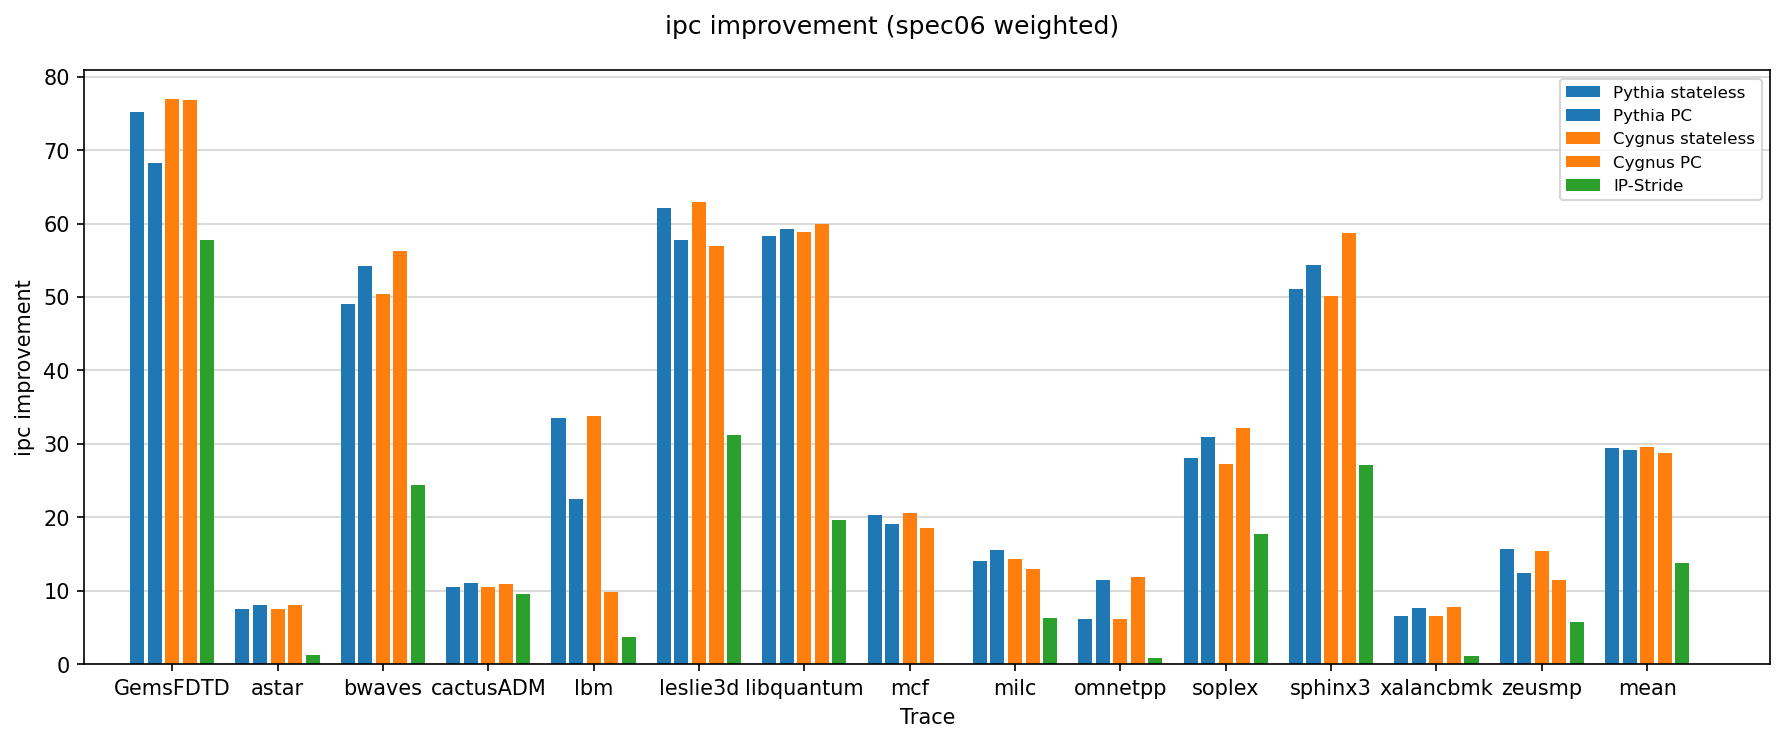

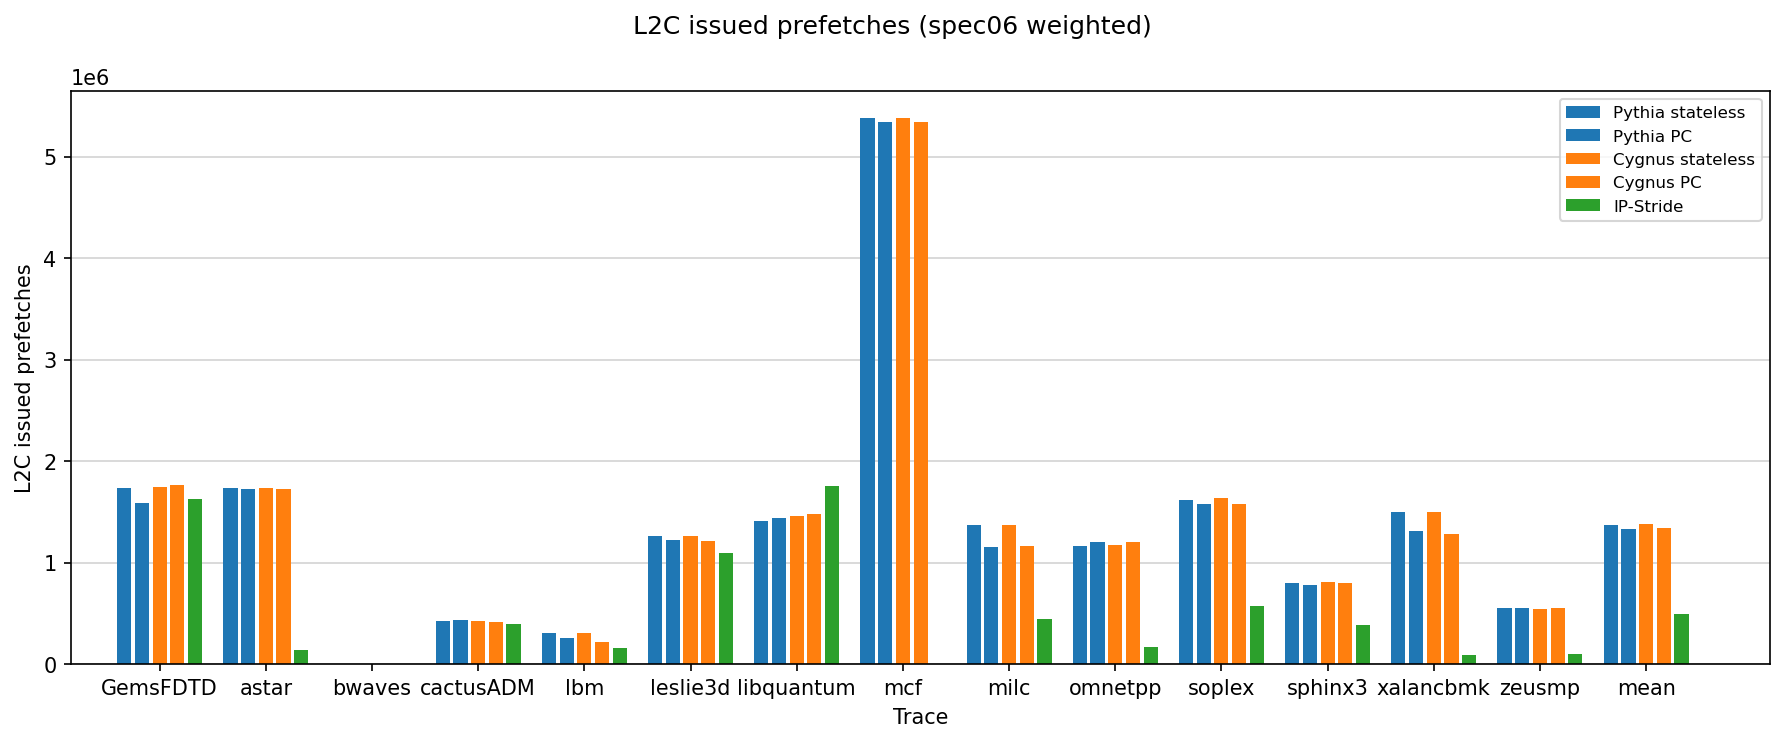

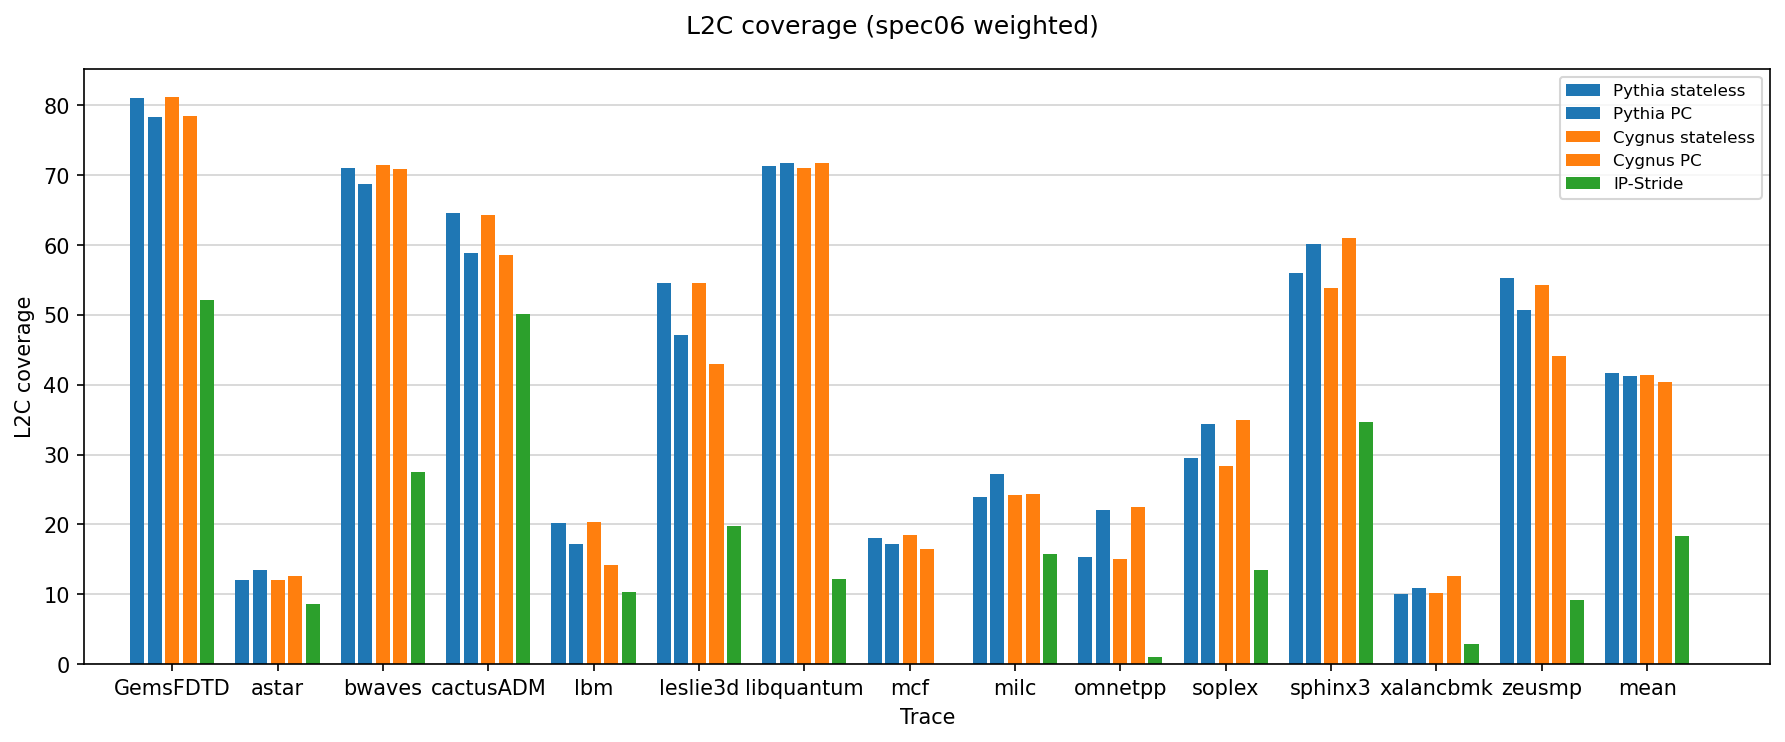

=== gap one_phase ===


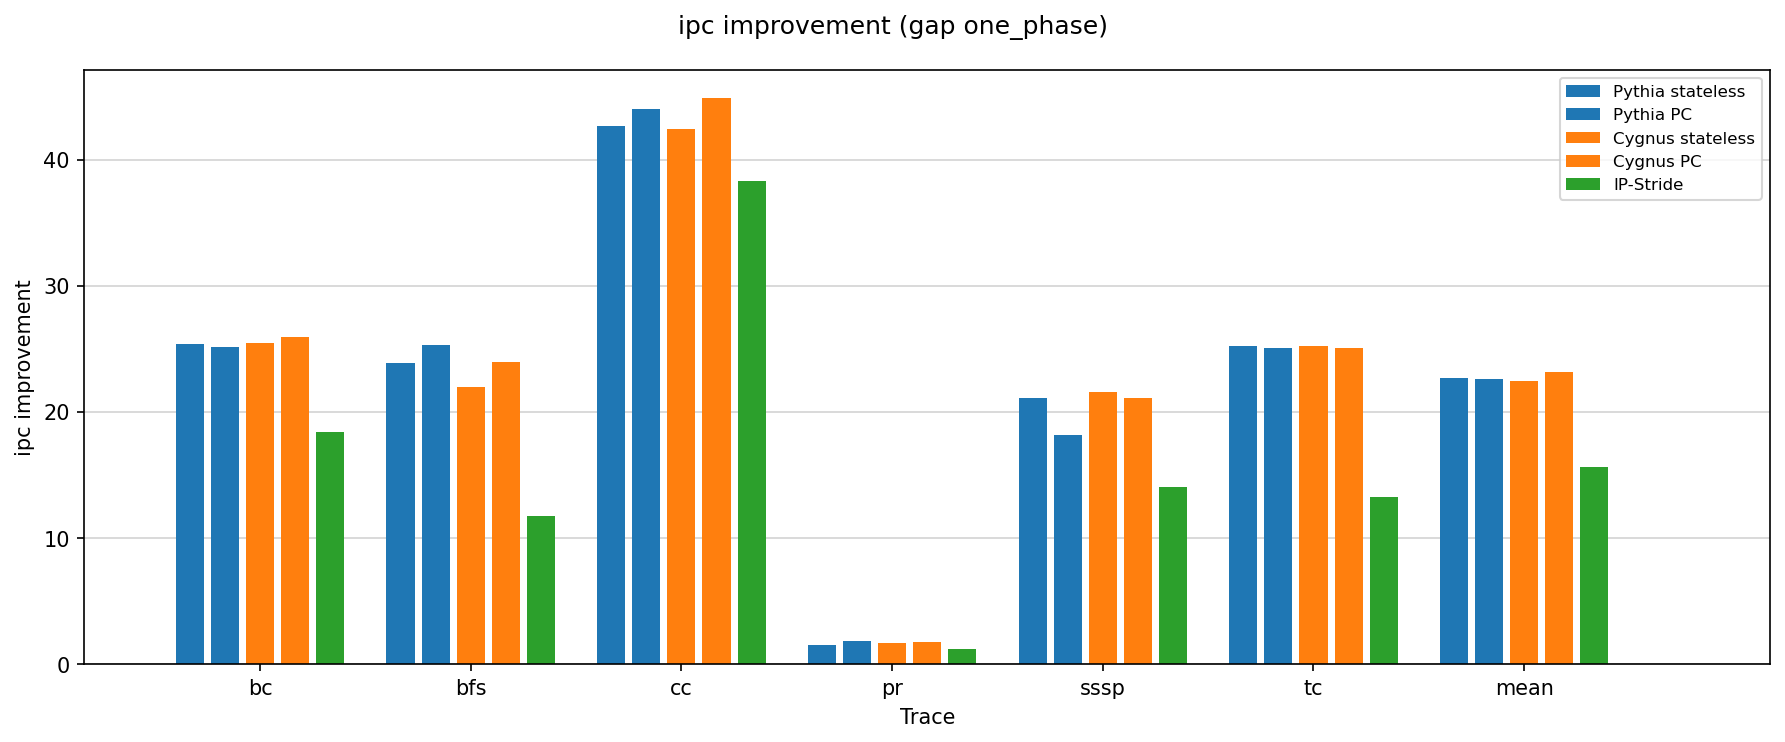

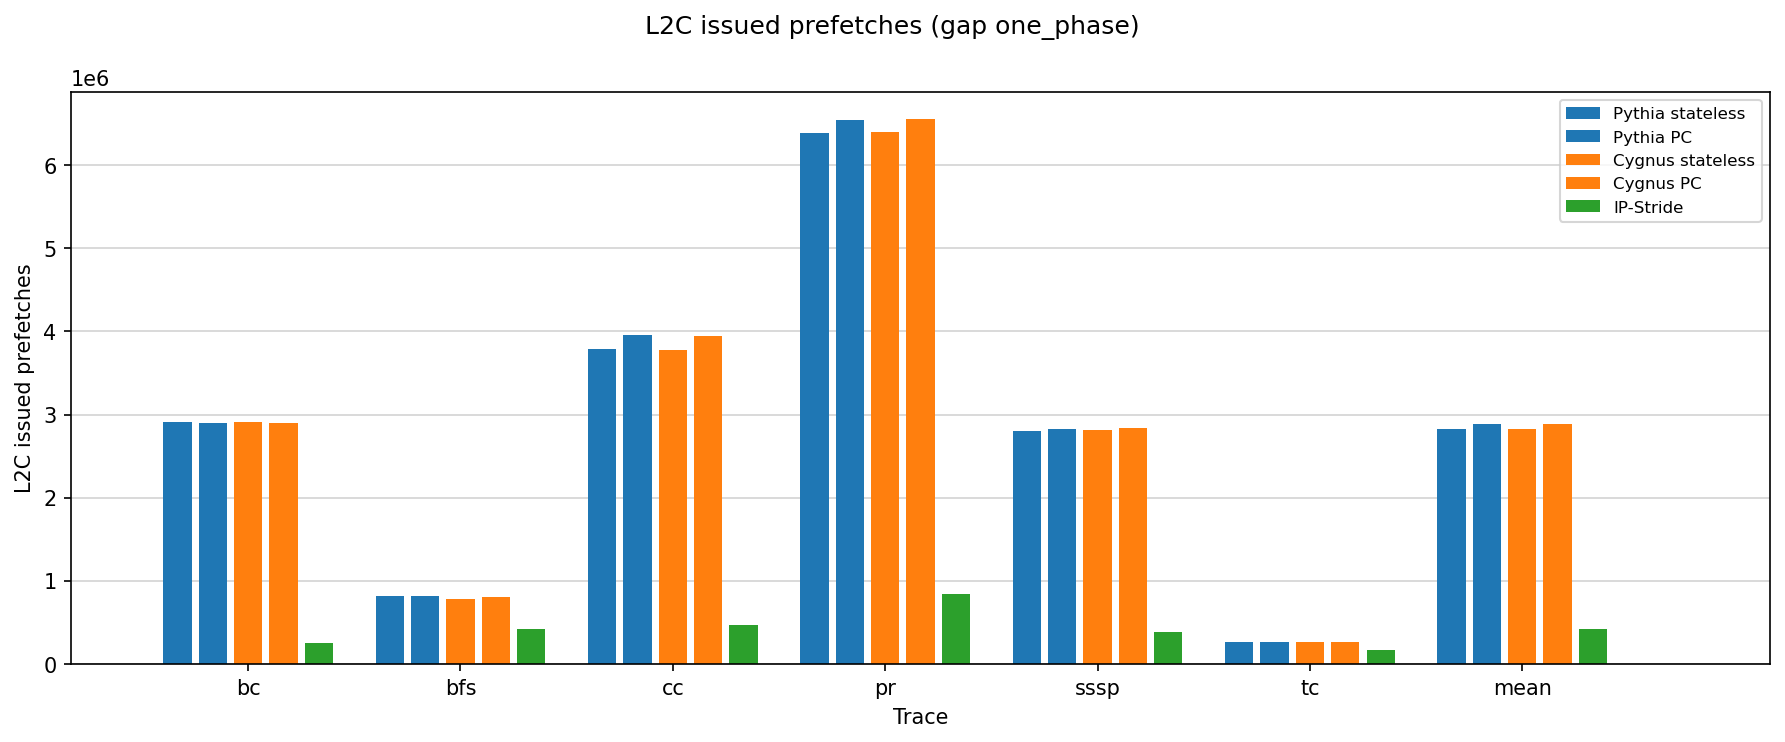

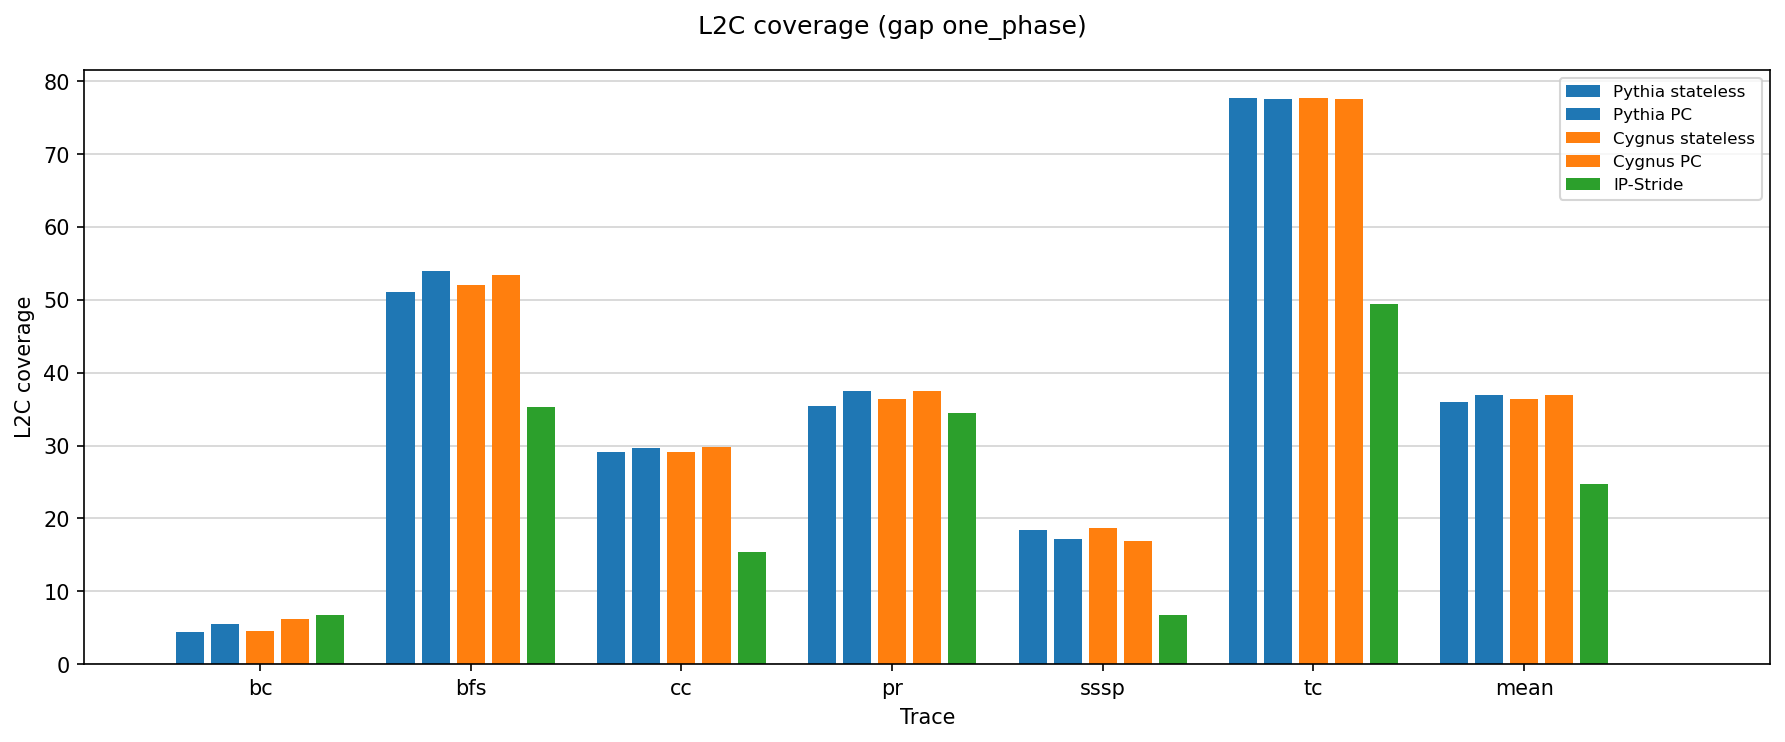

In [8]:
state_df = {
    'Pythia stateless': dfs['degree1_featureless_tuned_nozeroaction']['pythia'],
    'Pythia PC': dfs['degree1_tuned_nozeroaction']['PC'],
    'Cygnus stateless': dfs['degree1_featureless_tuned_nozeroaction']['cygnus'],
    'Cygnus PC': dfs['degree1_tuned_nozeroaction']['cygnus_state'],
    'IP-Stride': dfs['degree1_baseline']['ip_stride']
}
bias_df_colors = {
    'Pythia stateless': 'C0',
    'Pythia PC': 'C0',
    'Cygnus stateless': 'C1',
    'Cygnus PC': 'C1',
    'IP-Stride': 'C2'
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
    #'loc': 'upper left',
    #'bbox_to_anchor': (0, 1),
}
plots.plot_everything(state_df, suites=suites, metrics=metrics, 
                      legend_kwargs=legend_kwargs, dpi=dpi, colors=bias_df_colors,figsize=(12,5))

# Tables

## Baseline comparison

In [1]:
tables.table_everything(bias_df, suites=suites, metrics=metrics)

NameError: name 'tables' is not defined

## Tuned

In [14]:
tables.table_everything(tuned_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Pythia mix1,Pythia mix1 tuned,Pythia bias-only,Pythia bias-only tuned,Cygnus,Cygnus tuned,BO,BO +fallback
run_name,,,,,,,,
GemsFDTD_weighted,75.649998,72.198501,81.741021,76.704393,73.934763,75.790357,73.305169,73.052432
astar_weighted,7.463633,7.316200,5.856653,5.798031,5.867135,5.800073,0.200338,4.261799
bwaves_weighted,51.569444,48.278679,57.501151,48.990479,57.952536,50.055156,55.287940,55.287940
cactusADM_weighted,11.251756,10.527623,10.926957,10.193434,10.436975,10.205790,11.310023,11.310023
lbm_weighted,20.790960,22.930071,27.357697,33.673291,27.919938,33.597025,30.840697,30.840697
leslie3d_weighted,45.776763,59.854514,41.816151,64.966402,70.955380,63.399451,63.665984,63.665984
libquantum_weighted,55.211937,55.910974,54.688553,57.830102,58.549052,59.278573,70.914656,70.914656
mcf_weighted,31.020467,30.411074,31.077147,NaN,31.054407,30.391018,0.009263,27.606095
milc_weighted,8.397334,14.057256,10.947593,13.189557,9.442104,13.483047,12.302445,12.302445


L2C_issued_prefetches


,Pythia mix1,Pythia mix1 tuned,Pythia bias-only,Pythia bias-only tuned,Cygnus,Cygnus tuned,BO,BO +fallback
run_name,,,,,,,,
GemsFDTD_weighted,1.782242e+06,1.725712e+06,1.818680e+06,1.742374e+06,1.555902e+06,1.741979e+06,1880886.0,1.881110e+06
astar_weighted,1.729843e+06,1.712435e+06,1.741121e+06,1.732833e+06,1.740763e+06,1.733211e+06,170866.0,1.056435e+06
bwaves_weighted,2.407000e+03,2.390000e+03,2.406000e+03,2.391000e+03,2.335000e+03,2.323000e+03,1868.0,1.868000e+03
cactusADM_weighted,4.412050e+05,3.960750e+05,4.330600e+05,4.203190e+05,4.238770e+05,4.192580e+05,312156.0,3.121560e+05
lbm_weighted,2.884250e+05,2.608900e+05,3.463080e+05,3.032130e+05,3.424250e+05,3.043330e+05,341365.0,3.413650e+05
leslie3d_weighted,1.379578e+06,1.216023e+06,1.378003e+06,1.269374e+06,1.305012e+06,1.264946e+06,1040797.0,1.040797e+06
libquantum_weighted,1.659577e+06,1.497088e+06,1.687662e+06,1.403325e+06,1.736430e+06,1.485517e+06,1576894.0,1.576894e+06
mcf_weighted,5.413218e+06,5.396538e+06,5.419218e+06,NaN,5.424628e+06,5.403182e+06,0.0,3.506915e+06
milc_weighted,1.484578e+06,1.204904e+06,1.604593e+06,1.366873e+06,1.116640e+06,1.363137e+06,1076244.0,1.076244e+06


L2C_coverage


,Pythia mix1,Pythia mix1 tuned,Pythia bias-only,Pythia bias-only tuned,Cygnus,Cygnus tuned,BO,BO +fallback
run_name,,,,,,,,
GemsFDTD_weighted,68.923687,80.327476,71.772526,81.276003,78.531580,80.738531,57.830950,57.585085
astar_weighted,12.939980,12.375671,3.484190,3.436124,3.484586,3.439730,1.151974,3.724592
bwaves_weighted,70.154140,70.608885,70.627060,70.977893,71.667204,71.328960,69.945119,69.945119
cactusADM_weighted,58.834875,65.206673,63.191390,64.261957,65.104429,64.111113,61.796926,61.796926
lbm_weighted,10.570320,17.608112,15.626451,20.301535,14.287299,20.367973,17.147352,17.147352
leslie3d_weighted,27.903734,57.680359,20.370524,55.033565,47.399692,55.642021,41.731340,41.731340
libquantum_weighted,61.724497,71.195942,58.227913,70.428479,56.654550,70.912277,64.034780,64.034780
mcf_weighted,29.535827,29.060770,29.571692,NaN,29.575163,29.073272,0.018767,28.967447
milc_weighted,18.944355,29.134666,18.882720,23.690465,24.806832,24.192119,25.137107,25.137107


=== gap one_phase ===
ipc_improvement


,Pythia mix1,Pythia mix1 tuned,Pythia bias-only,Pythia bias-only tuned,Cygnus,Cygnus tuned,BO,BO +fallback
run_name,,,,,,,,
bc,27.115018,26.255405,27.117960,26.672748,27.133539,26.651457,9.945958,12.781503
bfs,28.493352,26.014704,28.670511,28.195113,26.746527,21.529636,27.551275,27.144839
cc,42.615344,42.096928,41.308715,40.461074,41.306818,40.463287,41.380629,41.380629
pr,1.582309,1.742187,1.583514,1.561420,1.582309,1.561420,1.264562,1.264562
sssp,21.558318,20.610680,19.994803,19.657326,20.004851,19.636190,17.786825,19.698558
tc,25.851008,25.269940,25.826945,25.141479,17.065609,16.556475,24.792508,24.792508
mean,23.913095,23.073608,23.481634,23.035375,21.702899,20.502806,19.765790,20.534186


L2C_issued_prefetches


,Pythia mix1,Pythia mix1 tuned,Pythia bias-only,Pythia bias-only tuned,Cygnus,Cygnus tuned,BO,BO +fallback
run_name,,,,,,,,
bc,2964316.0,2.948338e+06,2966924.0,2.952268e+06,2.966878e+06,2.952102e+06,3.826460e+05,6.435800e+05
bfs,860563.0,8.044290e+05,888393.0,8.727210e+05,8.621520e+05,8.139500e+05,6.844050e+05,7.006490e+05
cc,4000865.0,3.971503e+06,4020517.0,3.998163e+06,4.020542e+06,3.998030e+06,1.053590e+06,1.053590e+06
pr,6660669.0,6.595621e+06,6660989.0,6.623494e+06,6.660978e+06,6.623378e+06,1.760746e+06,1.760746e+06
sssp,2880618.0,2.886802e+06,2909477.0,2.892958e+06,2.912338e+06,2.896072e+06,8.148960e+05,1.196020e+06
tc,272921.0,2.707860e+05,272921.0,2.704580e+05,2.638080e+05,2.615430e+05,2.133560e+05,2.133560e+05
mean,2939992.0,2.912913e+06,2953203.5,2.935010e+06,2.947783e+06,2.924179e+06,8.182732e+05,9.279902e+05


L2C_coverage


,Pythia mix1,Pythia mix1 tuned,Pythia bias-only,Pythia bias-only tuned,Cygnus,Cygnus tuned,BO,BO +fallback
run_name,,,,,,,,
bc,2.756694,4.118505,2.691920,2.650351,2.686712,2.646788,3.551799,3.120215
bfs,53.287236,53.705480,51.973109,52.049333,52.428351,50.528435,54.759875,55.096945
cc,22.833556,28.911635,12.343097,12.582639,12.343524,12.586267,28.379627,28.379627
pr,36.000045,37.022343,35.997207,35.536959,36.001181,35.531913,35.293936,35.293936
sssp,16.683126,13.833135,9.408473,9.414112,9.409840,9.393181,14.980052,14.391771
tc,79.037607,77.798915,78.987793,77.553170,63.487786,62.191691,75.874698,75.874698
mean,35.099711,35.898336,31.900267,31.631094,29.392899,28.813046,35.473331,35.359532


## Action fallback

In [15]:
tables.table_everything(fallback_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


/u/cmolder/GitHub/pythia-analysis/utils/tables.py:61: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  metric_df = pd.concat(data_df_.values(), axis=1)


ValueError: cannot reindex on an axis with duplicate labels

## Action selection

In [12]:
# tables.table_everything(selection_df, suites=suites, metrics=metrics)

NameError: name 'selection_df' is not defined

## Statefulness

In [11]:
tables.table_everything(state_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Pythia stateless,Pythia PC,Cygnus stateless,Cygnus PC,IP-Stride
run_name,,,,,
GemsFDTD_weighted,75.177396,68.210408,77.024885,76.859385,57.708577
astar_weighted,7.544824,7.991181,7.545060,8.004833,1.228951
bwaves_weighted,49.024491,54.251207,50.378281,56.190699,24.396041
cactusADM_weighted,10.456709,10.985008,10.448741,10.909120,9.567030
lbm_weighted,33.449160,22.541832,33.787676,9.845012,3.690570
leslie3d_weighted,62.155007,57.727566,62.878806,56.875018,31.191953
libquantum_weighted,58.358944,59.289007,58.779696,59.970924,19.646244
mcf_weighted,20.344540,19.091165,20.527450,18.591386,0.013050
milc_weighted,14.025493,15.603025,14.248696,12.997538,6.273641


L2C_issued_prefetches


,Pythia stateless,Pythia PC,Cygnus stateless,Cygnus PC,IP-Stride
run_name,,,,,
GemsFDTD_weighted,1.734299e+06,1.591611e+06,1.744010e+06,1.766164e+06,1.628878e+06
astar_weighted,1.730513e+06,1.725920e+06,1.730383e+06,1.725545e+06,1.403940e+05
bwaves_weighted,2.391000e+03,2.353000e+03,2.390000e+03,2.362000e+03,1.153000e+03
cactusADM_weighted,4.246940e+05,4.366320e+05,4.220370e+05,4.188640e+05,3.938720e+05
lbm_weighted,3.018580e+05,2.557690e+05,3.043270e+05,2.216820e+05,1.595780e+05
leslie3d_weighted,1.265328e+06,1.224995e+06,1.266701e+06,1.208824e+06,1.089955e+06
libquantum_weighted,1.407406e+06,1.437453e+06,1.460668e+06,1.474826e+06,1.750943e+06
mcf_weighted,5.379833e+06,5.339653e+06,5.380564e+06,5.341491e+06,5.571000e+03
milc_weighted,1.371418e+06,1.156242e+06,1.370778e+06,1.159023e+06,4.428670e+05


L2C_coverage


,Pythia stateless,Pythia PC,Cygnus stateless,Cygnus PC,IP-Stride
run_name,,,,,
GemsFDTD_weighted,81.002299,78.303916,81.228657,78.523426,52.189178
astar_weighted,11.988883,13.477867,12.109654,12.618177,8.539431
bwaves_weighted,71.023860,68.711912,71.487475,70.881518,27.440340
cactusADM_weighted,64.578924,58.858928,64.335765,58.521376,50.127419
lbm_weighted,20.203990,17.247716,20.393267,14.210418,10.303681
leslie3d_weighted,54.639615,47.122617,54.540407,43.038049,19.705425
libquantum_weighted,71.280583,71.723289,70.999994,71.694042,12.153018
mcf_weighted,18.003249,17.220559,18.416438,16.411955,0.028530
milc_weighted,23.864188,27.249852,24.243138,24.294430,15.769624


=== gap one_phase ===
ipc_improvement


,Pythia stateless,Pythia PC,Cygnus stateless,Cygnus PC,IP-Stride
run_name,,,,,
bc,25.378309,25.136143,25.471956,25.946595,18.405510
bfs,23.871153,25.300517,21.974318,23.959337,11.739889
cc,42.652170,44.019017,42.438798,44.927193,38.364652
pr,1.544951,1.828151,1.652205,1.735358,1.183016
sssp,21.109273,18.208671,21.567500,21.085539,14.084456
tc,25.235693,25.080495,25.230091,25.068018,13.225905
mean,22.698467,22.624442,22.465678,23.136745,15.650505


L2C_issued_prefetches


,Pythia stateless,Pythia PC,Cygnus stateless,Cygnus PC,IP-Stride
run_name,,,,,
bc,2.906168e+06,2.903461e+06,2.907318e+06,2.898141e+06,252012.0
bfs,8.219870e+05,8.127580e+05,7.869410e+05,8.104650e+05,417791.0
cc,3.790330e+06,3.951839e+06,3.781785e+06,3.949791e+06,475168.0
pr,6.390779e+06,6.541004e+06,6.395533e+06,6.554762e+06,844795.0
sssp,2.807624e+06,2.826610e+06,2.814098e+06,2.843842e+06,380784.0
tc,2.708800e+05,2.693280e+05,2.708580e+05,2.693330e+05,168137.0
mean,2.831295e+06,2.884167e+06,2.826089e+06,2.887722e+06,423114.5


L2C_coverage


,Pythia stateless,Pythia PC,Cygnus stateless,Cygnus PC,IP-Stride
run_name,,,,,
bc,4.348549,5.525447,4.542415,6.194567,6.769495
bfs,51.051116,53.987361,52.037083,53.453420,35.355835
cc,29.049492,29.655870,29.054187,29.741764,15.415534
pr,35.382365,37.417689,36.383407,37.518607,34.448623
sssp,18.382186,17.161884,18.742621,16.915244,6.798715
tc,77.731549,77.602034,77.694070,77.613895,49.458458
mean,35.990876,36.891714,36.408964,36.906249,24.707777
